**Objective:** <br>
Analyze a heart disease dataset using NumPy, Pandas, and Matplotlib to gain insights into how different factors contribute to heart disease. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

1. Data Loading & Preprocessing (Pandas) 
    - Load the dataset.  
    - Display all of its columns.  
    - Display the first few and last rows of the dataset.  
    - Display the descriptive statistics for the whole data.  
    - Check for missing values and handle them appropriately with mean imputation 
    - Display the data null values and their count before and after imputations.  
    - Check and remove outliers of at least one column.  
    - Check for the data shape before and after imputation. 

In [2]:
# load the data
data = pd.read_csv("heart.csv")

In [3]:
# Display all of its columns
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
# Display the first few rows of the data set
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1.0,106,0,1.9,1,3,2,0


In [5]:
# Display the first few rows of the data set
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1.0,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0.0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0.0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0.0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1.0,113,0,1.4,1,1,3,0


In [6]:
# Display the descriptive statistics for the whole data.
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1024.000000,1025.000000,1025.000000,1023.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529297,149.114146,0.336585,1.072043,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527931,23.005724,0.472772,1.176008,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Check for missing values 
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Check for the data shape before and after imputation. 
data.shape

(1025, 14)

In [9]:
# and handle them appropriately with mean imputation 
data.fillna(data.mean(), inplace = True)

In [10]:
# Display the data null values and their count before and after imputations.
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# Check for the data shape before and after imputation. 
data.shape

(1025, 14)

In [12]:
columns = data.columns
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

data_cleaned = remove_outliers(data)

In [13]:
# Check for the data shape before and after imputation. 
data_cleaned.shape

(769, 14)

2. Numerical Analysis (NumPy & Pandas) 
- Compute statistics for key medical indicators: 
    - Mean, Median, and Standard Deviation of Cholesterol (chol) 
    - Mean Blood Pressure (trestbps) for patients with and without heart disease 
    - Max and Min values for Maximum Heart Rate (thalach) 
 - Sorting & Searching (NumPy): 
    - Sort patients by cholesterol levels. 
    - Identify patients with cholesterol above 300 mg/dL. 
    - Find patients older than 60 with abnormal ECG (restecg > 0). 
- Reshape & Split the whole Data using numpy.reshape() and numpy.split()

In [14]:
# Mean, Median, and Standard Deviation of Cholesterol (chol) 
print(f"Mean of Chol: {data_cleaned["chol"].mean()}")
print(f"Median of Chol: {data_cleaned["chol"].median()}")
print(f"Std of Chol: {data_cleaned["chol"].std()}")

Mean of Chol: 242.07542262678803
Median of Chol: 239.0
Std of Chol: 44.52114469388344


In [15]:
# Mean Blood Pressure (trestbps) for patients with and without heart disease
print(f"Mean of Blood Pressure for patients without heart disease: {data_cleaned[data_cleaned['target'] == 0]['trestbps'].mean()}")
print(f"Mean of Blood Pressure for patients with heart disease: {data_cleaned[data_cleaned['target'] == 1]['trestbps'].mean()}")

Mean of Blood Pressure for patients without heart disease: 130.13544668587897
Mean of Blood Pressure for patients with heart disease: 127.49289099526067


In [16]:
# Max and Min values for Maximum Heart Rate (thalach)
print(f"Minimum value for maximum heart rate: {data_cleaned["thalach"].min()}")
print(f"Maximum value for maximum heart rate: {data_cleaned["thalach"].max()}")

Minimum value for maximum heart rate: 88
Maximum value for maximum heart rate: 202


In [17]:
# Sort patients by cholesterol levels.
sorted_by_chol = data_cleaned.sort_values(by = "chol", ascending = False)
sorted_by_chol.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
40,65,0,2,160,360,0,0.0,151,0,0.8,2,0,2,1
751,65,0,2,160,360,0,0.0,151,0,0.8,2,0,2,1
419,65,0,2,160,360,0,0.0,151,0,0.8,2,0,2,1
435,57,0,0,120,354,0,1.0,163,1,0.6,2,0,2,1
422,57,0,0,120,354,0,1.0,163,1,0.6,2,0,2,1


In [18]:
# Identify patients with cholesterol above 300 mg/dL.
high_chol = data_cleaned[data_cleaned["chol"] > 300]
high_chol.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
16,51,0,2,140,308,0,0.0,142,0,1.5,2,1,2,1
25,61,0,0,145,307,0,0.0,146,1,1.0,1,0,3,0
40,65,0,2,160,360,0,0.0,151,0,0.8,2,0,2,1
42,61,0,0,130,330,0,0.0,169,0,0.0,2,0,2,0
44,55,0,1,132,342,0,1.0,166,0,1.2,2,0,2,1


In [20]:
# Find patients older than 60 with abnormal ECG (restecg > 0).
data_ab_ecg = data_cleaned[(data_cleaned["age"] > 60) & (data_cleaned["restecg"] > 0)]
data_ab_ecg

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
10,71,0,0,112,149,0,1.0,125,0,1.6,1,0,2,1
21,67,0,0,106,223,0,1.0,142,0,0.3,2,2,2,1
33,70,1,2,160,269,0,1.0,112,1,2.9,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,76,0,2,140,197,0,2.0,116,0,1.1,1,0,2,1
976,63,0,0,108,269,0,1.0,169,1,1.8,1,2,2,0
982,67,0,0,106,223,0,1.0,142,0,0.3,2,2,2,1
983,64,1,0,128,263,0,1.0,105,1,0.2,1,1,3,1


3. Data Visualization (Matplotlib & Seaborn) 
- Objective: Identify trends and correlations in heart disease factors. 
- Histogram: 
   - Distribution of cholesterol (chol) across all patients. 
   - Helps identify common cholesterol levels and potential outliers. 

- Scatter Plot: 
   - Age (age) vs. Maximum Heart Rate (thalach)
   - Shows how age affects heart rate and potential risk zones. 

- Bar Chart: 
   - Comparison of patients with and without heart disease (target) 
   - Helps visualize how many patients have heart disease. 

- 3D Plot: 
  - Cholesterol (chol), Age (age), and Heart Disease (target) 
  - Shows how cholesterol and age interact in heart disease diagnosis. 

- Pie Chart: 
  - Proportion of different Chest Pain Types (cp) among patients. 
  - Highlights which pain types are most common in heart diseasecases.

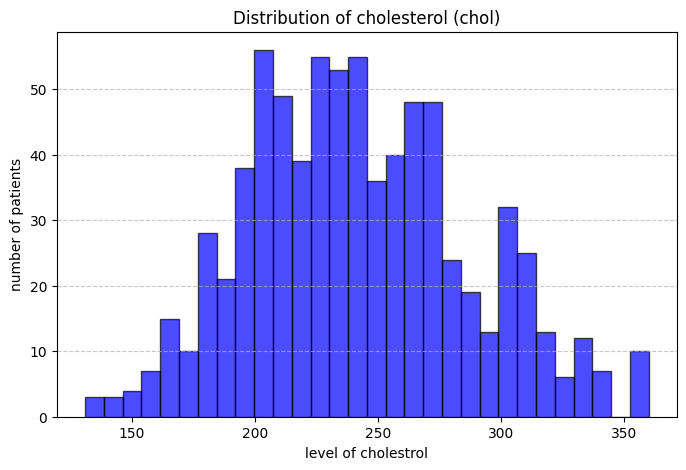

In [32]:
# Distribution of cholesterol (chol) across all patients.
plt.figure(figsize = (8,5))
plt.hist(data_cleaned['chol'], bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Distribution of cholesterol (chol)")
plt.xlabel("level of cholestrol")
plt.ylabel("number of patients")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

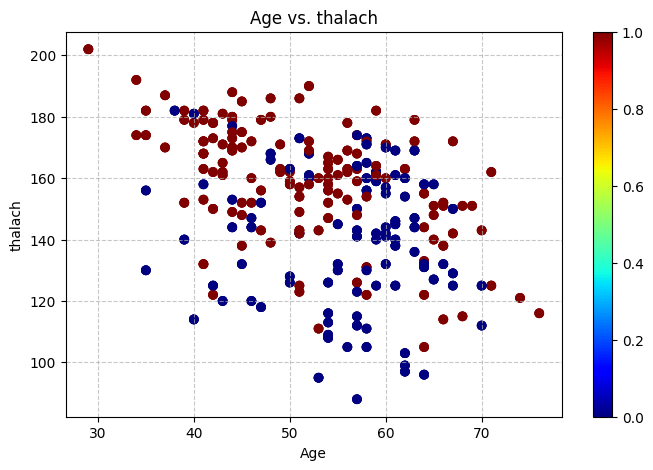

In [33]:
# Age (age) vs. Maximum Heart Rate (thalach)
plt.figure(figsize = (8,5))
plt.scatter(data_cleaned["age"], data_cleaned["thalach"], c = data_cleaned["target"], cmap = "jet")
plt.colorbar()
plt.title("Age vs. thalach")
plt.xlabel("Age")
plt.ylabel("thalach")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

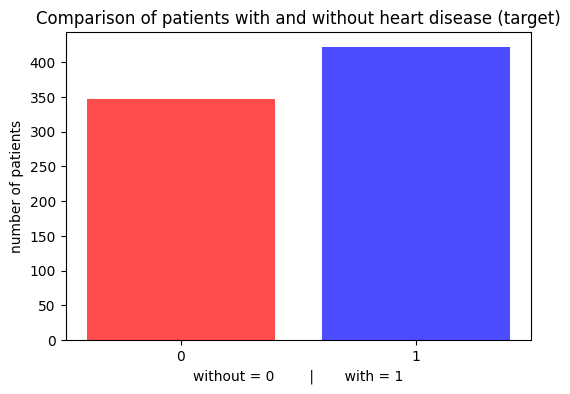

In [40]:
# Comparison of patients with and without heart disease (target) 
counts = data_cleaned["target"].value_counts()

plt.figure(figsize = (6,4))
plt.bar(counts.index, counts.values, color=["blue", "red"], alpha=0.7)
plt.title("Comparison of patients with and without heart disease (target)")
plt.xlabel("without = 0        |       with = 1")
plt.ylabel("number of patients")
plt.xticks([0, 1])
plt.show()

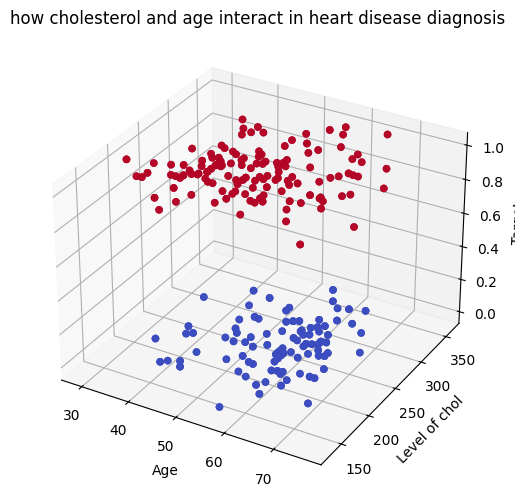

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_cleaned['age'], data_cleaned['chol'], data_cleaned['target'], 
           c=data_cleaned['target'], cmap='coolwarm', alpha=0.7)

ax.set_xlabel("Age")
ax.set_ylabel("Level of chol")
ax.set_zlabel("Target")
plt.title("how cholesterol and age interact in heart disease diagnosis")
plt.show()


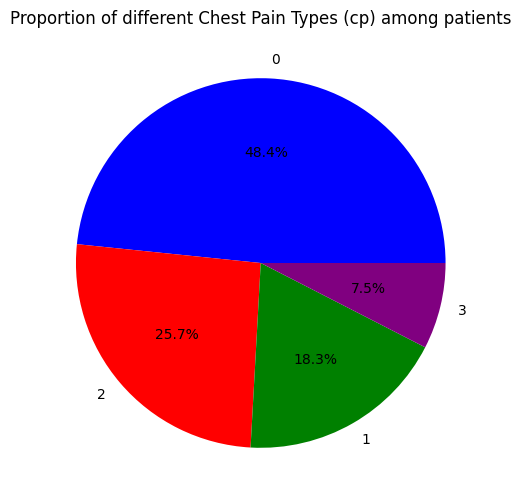

In [44]:
# Pie Chart: 
# - Proportion of different Chest Pain Types (cp) among patients. 
# - Highlights which pain types are most common in heart diseasecases.
plt.figure(figsize=(6, 6))
cp_counts = data_cleaned['cp'].value_counts()
plt.pie(cp_counts, labels=cp_counts.index, autopct="%1.1f%%", colors=["blue", "red", "green", "purple"])
plt.title("Proportion of different Chest Pain Types (cp) among patients")
plt.show()